In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars_clus.csv')
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


- ### clean data
Clean the numeric columns (delete rows contain null)

In [3]:
data.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [4]:
print("shape of data before cleaning", data.shape)
for col in ['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']:
     data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna()
data = data.reset_index(drop=True)
print(data.head())
print("shape of data after cleaning", data.shape)

shape of data before cleaning (159, 16)
  manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0  
shape of data after cleaning (117, 16)


Add a column as kml. MPG indicates miles per gallon, but we need km per liter.

In [5]:
data['kml'] = 236.25 / data['mpg']
print(data.head())
print(data.shape)

  manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

         kml  
0   8.437500  
1   9.450000  
2  10.738636  
3   8.750000  
4  10.738636  
(117, 17)


Make a numpy array from necessary columns for clustering.

In [6]:
from sklearn.preprocessing import MinMaxScaler
X = data[['engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg']].values
print(X[0:5])

[[  1.8   140.    101.2    67.3   172.4     2.639  13.2    28.   ]
 [  3.2   225.    108.1    70.3   192.9     3.517  17.2    25.   ]
 [  3.5   210.    114.6    71.4   196.6     3.85   18.     22.   ]
 [  1.8   150.    102.6    68.2   178.      2.998  16.4    27.   ]
 [  2.8   200.    108.7    76.1   192.      3.561  18.5    22.   ]]


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X[0:5])

[[0.11428571 0.21518987 0.18655098 0.28143713 0.30625832 0.2310559
  0.13364055 0.43333333]
 [0.31428571 0.43037975 0.3362256  0.46107784 0.5792277  0.50372671
  0.31797235 0.33333333]
 [0.35714286 0.39240506 0.47722343 0.52694611 0.62849534 0.60714286
  0.35483871 0.23333333]
 [0.11428571 0.24050633 0.21691974 0.33532934 0.38082557 0.34254658
  0.28110599 0.4       ]
 [0.25714286 0.36708861 0.34924078 0.80838323 0.56724368 0.5173913
  0.37788018 0.23333333]]


In [8]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X, metric='euclidean')
D[0:5]

array([[0.        , 0.57777143, 0.75455727, 0.2128736 , 0.77290095,
        1.04388755, 0.36842756, 0.56119503, 0.60285234, 0.7247098 ,
        0.89001868, 0.75843206, 1.02153513, 0.96535724, 0.63567563,
        0.17071078, 0.40323491, 0.61853796, 0.63420586, 0.6754556 ,
        0.93915518, 0.21397175, 0.80969062, 0.37590216, 0.44135804,
        0.789647  , 0.360225  , 0.86544357, 0.43833127, 0.35062872,
        0.41233945, 1.39719208, 1.65751061, 1.36554648, 1.51566212,
        1.07292701, 0.79233821, 0.13903196, 0.54835405, 0.29241045,
        0.6088358 , 1.11985701, 0.7983668 , 1.0894434 , 1.40878766,
        0.66400653, 1.57974136, 0.20393746, 0.3770946 , 0.27656925,
        0.69702407, 1.00353778, 0.26967695, 0.08283378, 0.4222794 ,
        0.5740503 , 0.58142148, 0.57784373, 0.76458229, 0.54793816,
        0.65334392, 0.92651776, 0.98116752, 1.18919833, 0.17306181,
        0.24453155, 0.31160876, 0.62953169, 0.56068485, 0.93464515,
        0.53842915, 0.25073154, 0.29894151, 0.62

In [9]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=6, linkage='complete')
ac.fit(D)
ac.labels_

C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [10]:
data['cluster'] = ac.labels_
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

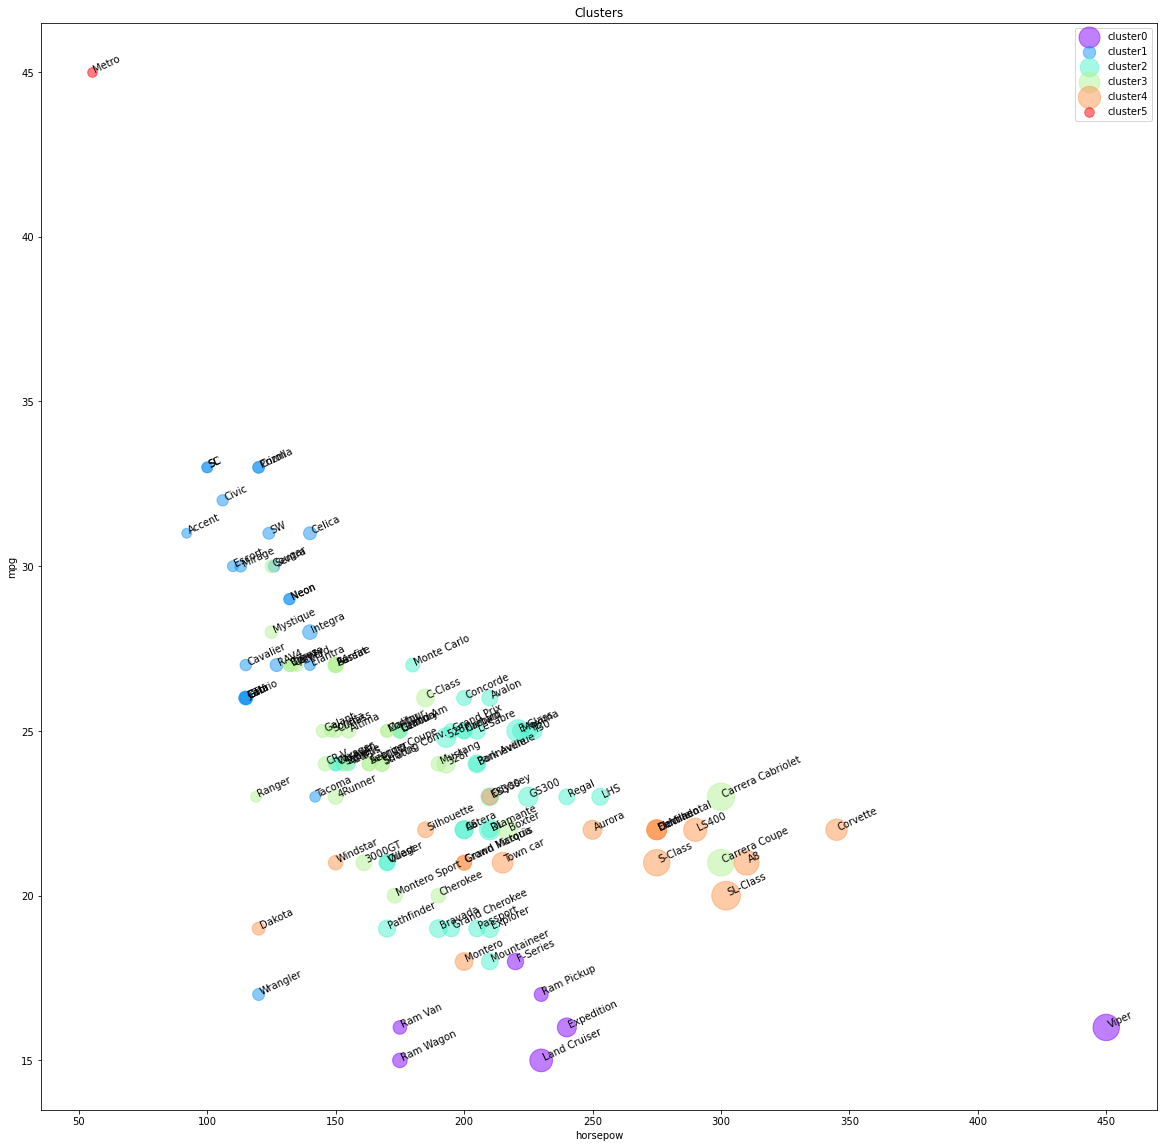

In [11]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 6))
cluster_labels = list(range(0, 6))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(20,20))

for color, label in zip(colors, cluster_labels):
    subset = data[data['cluster'] == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [12]:
data.groupby(['cluster', 'type'])['cluster'].count()

cluster  type
0        0.0      1
         1.0      6
1        0.0     20
         1.0      3
2        0.0     26
         1.0     10
3        0.0     28
         1.0      5
4        0.0     12
         1.0      5
5        0.0      1
Name: cluster, dtype: int64

In [13]:
agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

C:\Users\rohani.sara\AppData\Local\Temp\ipykernel_11716\1146392628.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster type                                            
0       0.0   450.000000  8.000000  16.000000  69.725000
        1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   118.500000  1.890000  29.550000  14.226100
        1.0   129.666667  2.300000  22.333333  14.292000
2       0.0   203.615385  3.284615  24.223077  27.988692
        1.0   182.000000  3.420000  20.300000  26.120600
3       0.0   168.107143  2.557143  25.107143  24.693786
        1.0   155.600000  2.840000  22.000000  19.807000
4       0.0   267.666667  4.566667  21.416667  46.417417
        1.0   173.000000  3.180000  20.600000  24.308400
5       0.0    55.000000  1.000000  45.000000   9.235000